<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/02__neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start

**Types of classification:**

* Binary classification
* Multiclass classification
* Multilabel classification

In [ ]:
# Make your dataset
from sklearn.datasets import make_circles

# 1000 samples
n_samples = 1000

# use function
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Visualize it using pandas
import pandas as pd

In [ ]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
# Visualize it using plot
import matplotlib.pyplot as plt

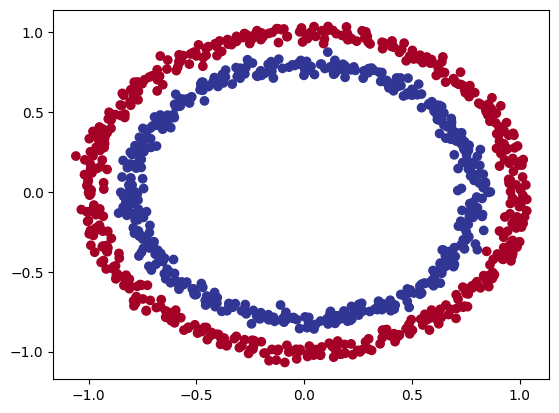

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output shapes

In [ ]:
# Check the shapes of data
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check number of samples
len(X), len(y)

(1000, 1000)

In [ ]:
# Check single data point
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Building a model

In [ ]:
import tensorflow as tf
import numpy as np
from ten

In [ ]:
# Create model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4828 - loss: 6.6253
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 6.4995
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4221 - loss: 5.6927
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4561 - loss: 6.8247
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 7.6996


In [ ]:
# Train for longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 7.8989  


[7.971191883087158, 0.5]

In [ ]:
# Create another model with another layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6936


[0.6932727694511414, 0.5]

### Improving model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5051 - loss: 0.6916  


[0.6955546736717224, 0.48899999260902405]

<Axes: >

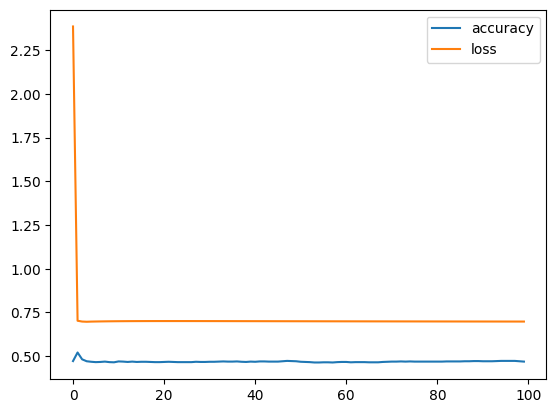

In [ ]:
pd.DataFrame(history.history).plot()

# To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):

  # Define axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclassification
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    # Reshaping predictions for plotting them
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    # Reshaping predictions for plotting them
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot Decision Boundary
  plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Binary Classification


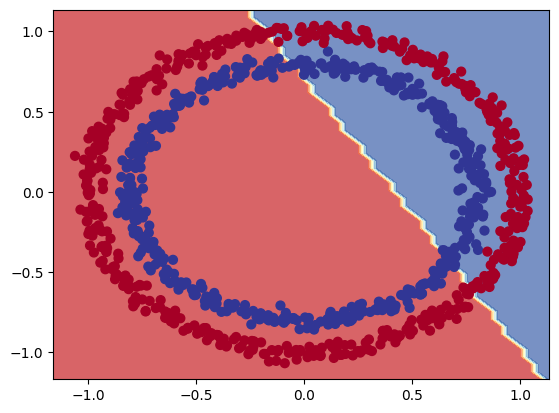

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

# history = model_3.fit(tf.expand_dims(X,axis=-1), y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create a regression problem
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# split data into train and test split
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), tf.expand_dims(y_reg_train, axis=-1), epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 409.4827 - mse: 199204.3281
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286.8147 - mse: 94658.1172  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.7437 - mse: 28380.2617 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.1785 - mse: 3453.7358 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.1782 - mse: 10022.3555
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.5325 - mse: 9191.2773  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.9345 - mse: 3147.9492 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.9120 - mse: 3340.8750 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7880 - mse: 2478.6467 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.0086 - mse: 2717.3779 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.8466 - mse: 2469.0623 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.9397 - mse: 2642

In [ ]:
# Make predictions with reg model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


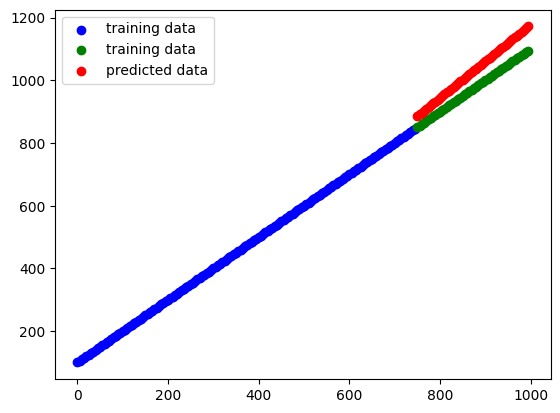

In [ ]:
# plot model's predictions agains data
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="training data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predicted data")
plt.legend();

### Non-linearity

In [ ]:
tf.random.set_seed(42)

# Create new model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy", # or tf.keras.losses.binary_crossentropy(), or tf.keras.losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4544 - loss: 6.8082
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4531 - loss: 6.7701 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4531 - loss: 6.7684 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4531 - loss: 6.7666 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4531 - loss: 6.7606 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4528 - loss: 6.7521  
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4528 - loss: 6.7498 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4528 - loss: 6.7437
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4526 - loss: 6.7429 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4533 - loss: 6.7412 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4533 - loss: 6.7406 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

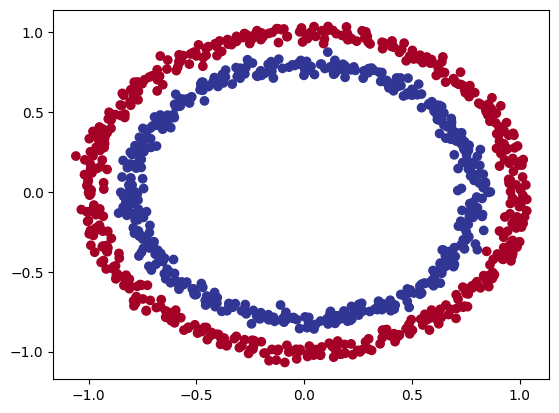

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Binary Classification


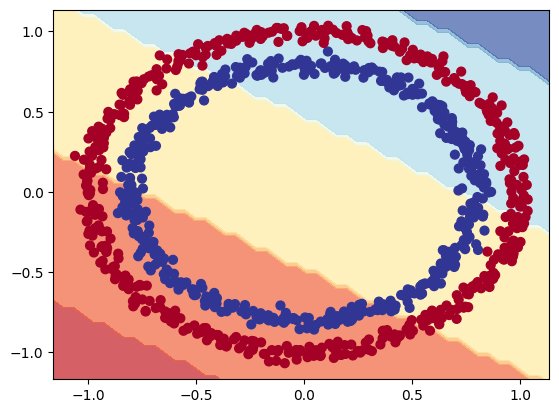

In [ ]:
plot_decision_boundary(model_4, X, y)

# Built a model with non-linear function

In [ ]:
tf.random.set_seed(42)

# Create new model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy", # or tf.keras.losses.binary_crossentropy(), or tf.keras.losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4573 - loss: 6.5894
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4577 - loss: 6.5204
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4553 - loss: 6.5048
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 6.4904
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 6.4869
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4554 - loss: 6.4849
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 6.4831
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 6.4561
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4587 - loss: 6.4608
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 6.4585
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4541 - loss: 6.4427
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
tf.random.set_seed(42)

# Create model, now with non-linear activation function
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy", # or tf.keras.losses.binary_crossentropy(), or tf.keras.losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4830 - loss: 2.8778
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.3919
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 2.1561
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.8954
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.6878
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4828 - loss: 1.4605
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 1.2304
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4211 - loss: 0.9380
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3869 - loss: 0.8986
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3787 - loss: 0.8790
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3686 - loss: 0.8647
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
model_6.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

In [ ]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6220 - loss: 0.6469


[0.6472446918487549, 0.6259999871253967]

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Binary Classification


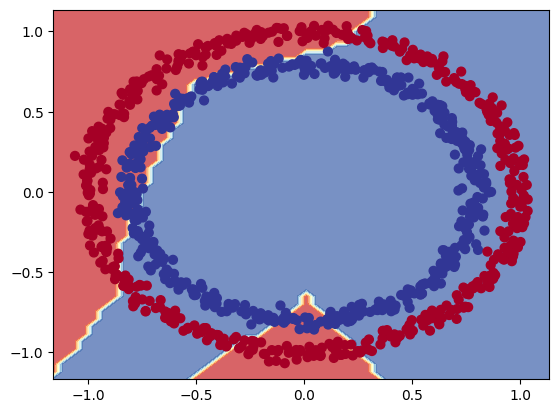

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Final model
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss="binary_crossentropy", # or tf.keras.losses.binary_crossentropy(), or tf.keras.losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5170 - loss: 0.7983 
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 0.7681 
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5166 - loss: 0.7495 
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4737 - loss: 0.7380
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3944 - loss: 0.7305 
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4478 - loss: 0.7245 
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4451 - loss: 0.7204 
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 0.7177 
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4231 - loss: 0.7155 
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4027 - loss: 0.7138 
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3718 - loss: 0.7123 
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
# Model evaluation
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.2725


[0.26986199617385864, 0.972000002861023]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary Classification


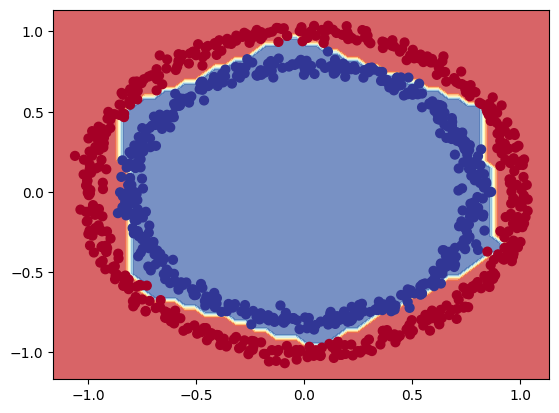

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

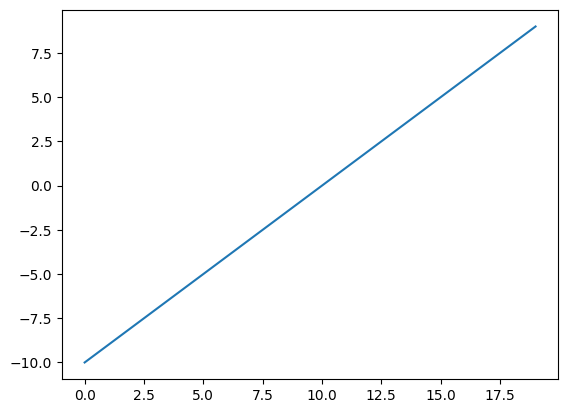

In [ ]:
plt.plot(A)

In [ ]:
# Recreating sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

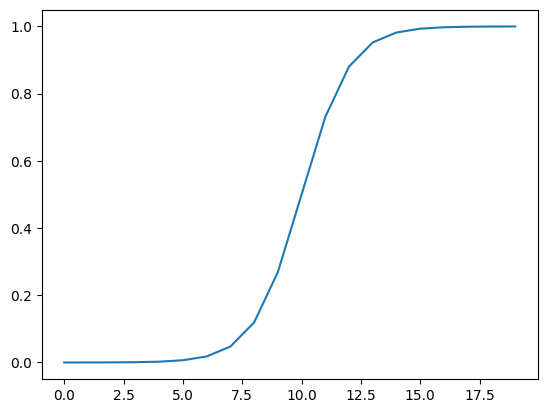

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Recreating relu activation function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

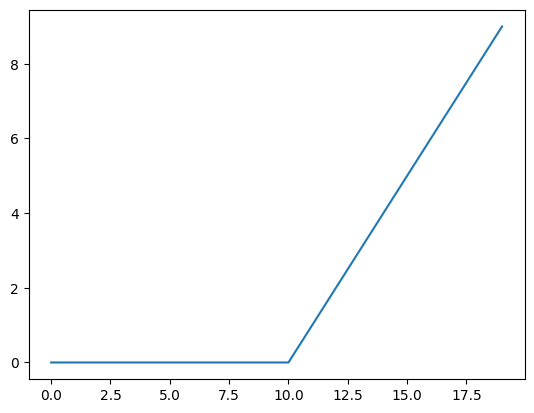

In [ ]:
plt.plot(relu(A))

In [ ]:
# Recreating linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

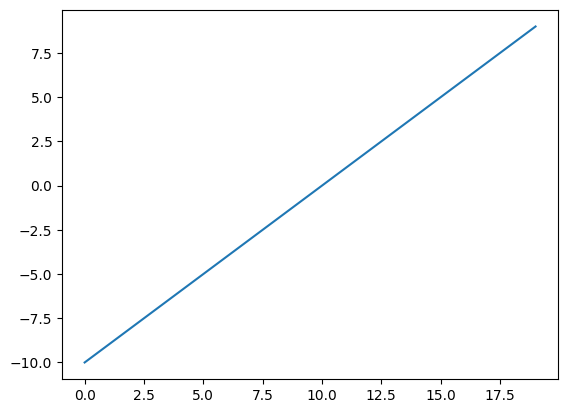

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
tf.keras.activations.tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -1.        , -0.99999833, -0.99998784,
       -0.99990916, -0.9993292 , -0.9950547 , -0.9640276 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640276 ,  0.9950547 ,  0.9993292 ,
        0.99990916,  0.99998784,  0.99999833,  1.        ,  1.        ],
      dtype=float32)>

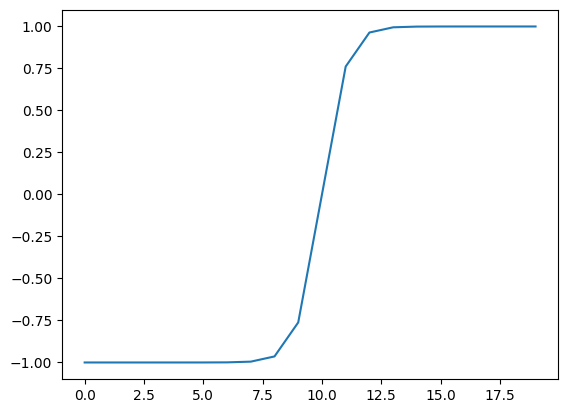

In [ ]:
plt.plot(tf.keras.activations.tanh(A))

### Evaluating and improving calssification model

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4781 - loss: 0.6988
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 0.6882 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5489 - loss: 0.6806  
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6007 - loss: 0.6702 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6054 - loss: 0.6547 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 0.6327 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 0.6025 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7175 - loss: 0.5679 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7615 - loss: 0.5300 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4914 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.4582  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
# Evaluating a model
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0386  


[0.04046080633997917, 0.9950000047683716]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary Classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary Classification


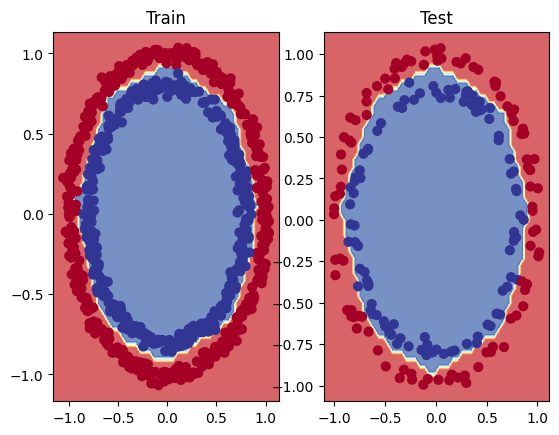

In [ ]:
# Plot decision boudaries for training data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

### Plot loss (or training) curves

<Axes: >

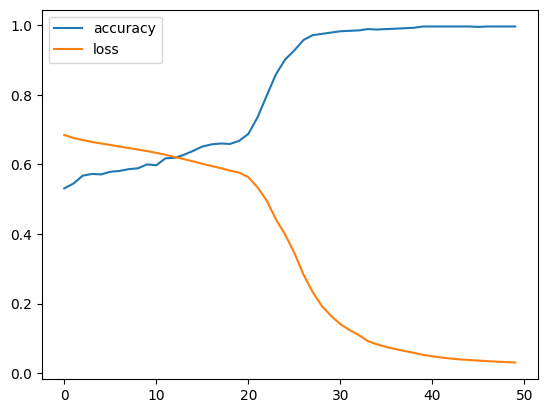

In [ ]:
pd.DataFrame(history.history).plot()

### Finding best learning rate

To do so, we're going to use the following:

* **A learning rate callback.** - You can think of a callback as an extra piece of functionality you can add to your model while its training.

* A modified loss curves plot.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def plot_decision_boundary(model, X, y):

  # Define axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclassification
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    # Reshaping predictions for plotting them
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    # Reshaping predictions for plotting them
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot Decision Boundary
  plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
# Make your dataset
from sklearn.datasets import make_circles

# 1000 samples
n_samples = 1000

# use function
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_9.compile("Adam", "binary_crossentropy", metrics=["accuracy"])

# Create a learning rate callback before training
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# Fit the model (with passing lr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler]) # inside callbacks=[callback_1, callback_2, callback_3, ...]

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5020 - loss: 0.6948 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.6948 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 0.6947 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 0.6946 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6944 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6943 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5024 - loss: 0.6942 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6940 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5017 - loss: 0.6939 - learning_

<Axes: >

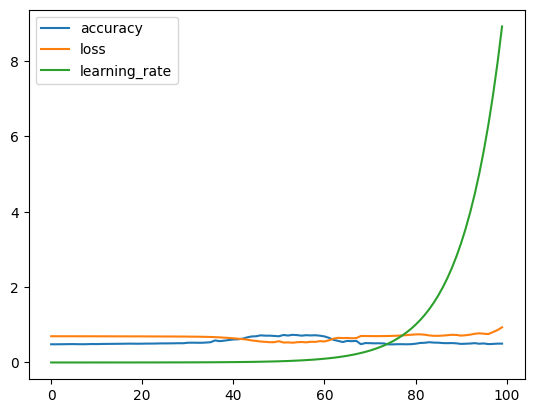

In [ ]:
pd.DataFrame(history.history).plot()

Text(0, 0.5, 'loss')

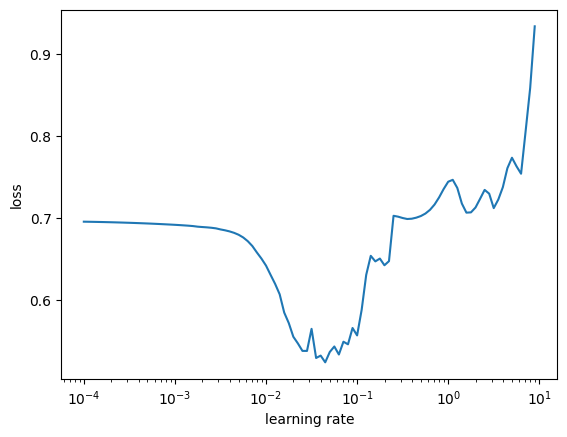

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [ ]:
# trying tuo use higher *ideal* learning rate on the same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile model with learning rate 0.02
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs/20))

history = model_10.fit(X_train, y_train, epochs=40)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4880 - loss: 0.6995 
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 0.6864 
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 0.6753 
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 0.6504  
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.5732 
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.4430 
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.3175 
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.2183 
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.1598  
Epoch 10/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.1229 
Epoch 11/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0996 
Epoch 12/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
# Evaluate model_10 on test dataset
model_10.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0207


[0.017460757866501808, 0.9975000023841858]

In [ ]:
# Evaluate model_8 on test dataset
model_8.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0323  


[0.030021531507372856, 0.9987499713897705]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Binary Classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary Classification


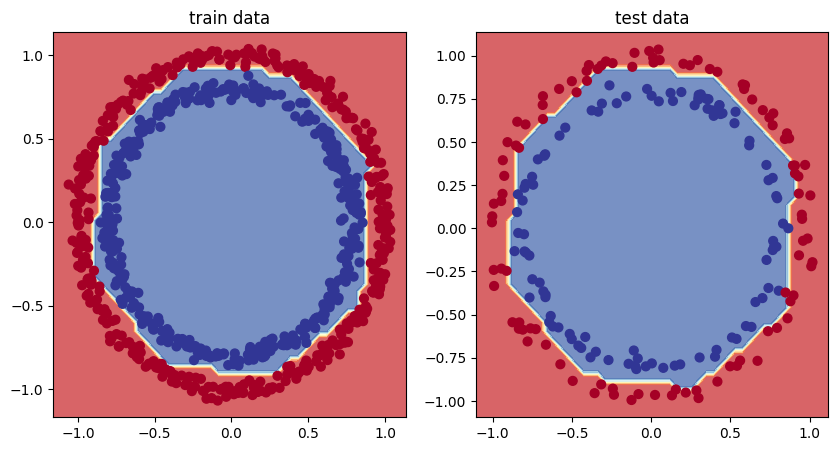

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_10, X_test, y_test)

### More classification evaluation metrics

* Accuracy - most common
* Precision - higher precision = less false positives (have a precision-recall tradeoff)
* Recall - higher recall = less false negatives (have a precision-recall tradeoff)
* F1-score - combination of precision and recall
* Confusion matrix - plot precision and recall
* Classification report - show overall report of common metrics

In [ ]:
# Print accuracy
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy * 100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.0668 
Loss: 0.05421218276023865
Accuracy: 98.00%


In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Converting from probabilities format to binary format
y_pred_probs = model_10.predict(X_test)
y_pred = tf.round(y_pred_probs)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_pred[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 96,   4],
       [  0, 100]])

## Convert matrix into more visualized variant (with plot_confusion_matrix from scikit-learn)

In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=(10, 10))
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

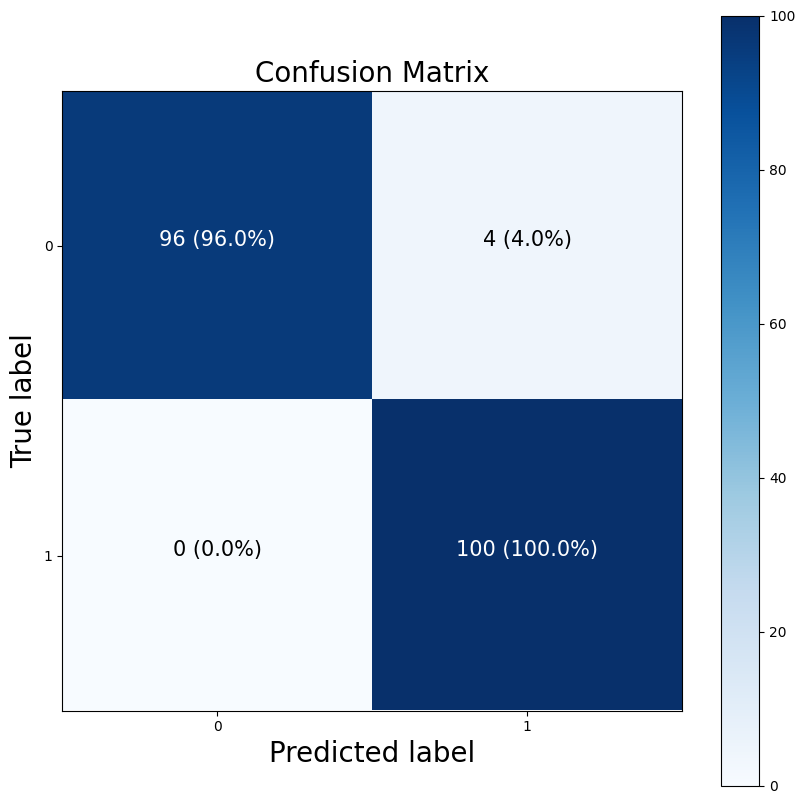

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Multiclass classification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Its already been splitte into train and test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"training sample:\n{X_train[0]}\n")
print(f"training label:\n{y_train[0]}\n")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape
X_train[0].shape, y_train[0].shape

((28, 28), ())

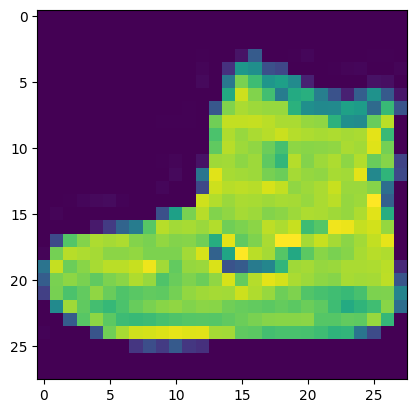

In [ ]:
# plot single example
plt.imshow(X_train[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

dict_names = {0: "T-shirt/top",
              1: "Trouser",
              2: "Pullover",
              3:"Dress",
              4:"Coat",
              5:"Sandal",
              6:"Shirt",
              7:"Sneaker",
              8:"Bag",
              9:"Ankle boot"}

Text(0.5, 1.0, 'T-shirt/top')

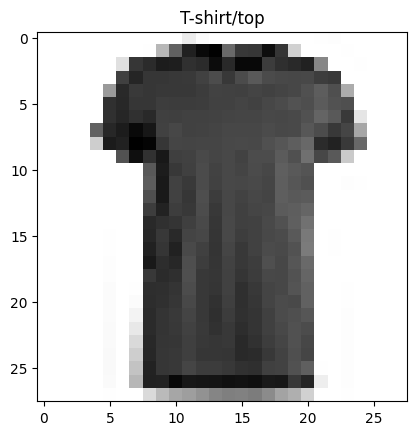

In [ ]:
index_of_choice = 17

plt.imshow(X_train[index_of_choice], cmap=plt.cm.binary)
plt.title(dict_names[y_train[index_of_choice]])

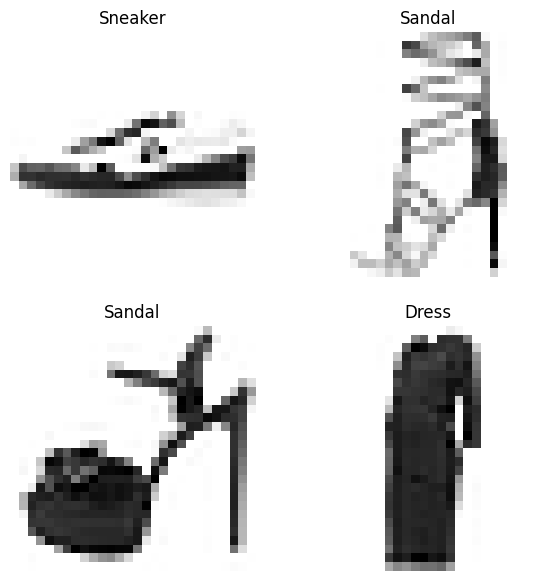

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(dict_names[y_train[rand_index]])
  plt.axis(False)

### Building multi-class classification model

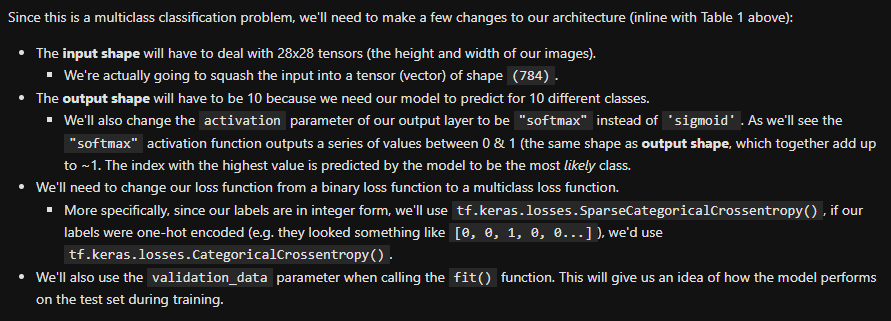

In [ ]:
# our data needs to be converted into single long vector(?):
# from 28, 28 to None, 784

flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
]);
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

In [ ]:
# We can use just CategoricalCrossentropy() if we one-hot our labels
tf.one_hot(y_train, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Build the model
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax), # 10, because we have 10 classes
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0992 - loss: 2.5333 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [ ]:
# Check model summary
model_11.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

### Scaling data

In [ ]:
# Check min and max values of training data
X_train.min(), X_train.max()

(0, 255)

In [ ]:
# Scale the data to be between 0 and 1
scaled_X_train = X_train / 255.0
scaled_X_test = X_test / 255.0

# Check min and max now
scaled_X_train.min(), scaled_X_train.max()

(0.0, 1.0)

In [ ]:
# Create model
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(scaled_X_train, y_train, epochs=10,
             validation_data=(scaled_X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3884 - loss: 1.5977 - val_accuracy: 0.6150 - val_loss: 1.0256
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6641 - loss: 0.9367 - val_accuracy: 0.6967 - val_loss: 0.8237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7054 - loss: 0.7968 - val_accuracy: 0.7279 - val_loss: 0.7639
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7411 - loss: 0.7405 - val_accuracy: 0.7595 - val_loss: 0.7093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7635 - loss: 0.6898 - val_accuracy: 0.7663 - val_loss: 0.6814
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7707 - loss: 0.6636 - val_accuracy: 0.7695 - val_loss: 0.6656
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7763 - loss: 0.6473 - val_accuracy: 0.7733 - val_loss: 0.6549
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7810 - loss: 0.6357 - 

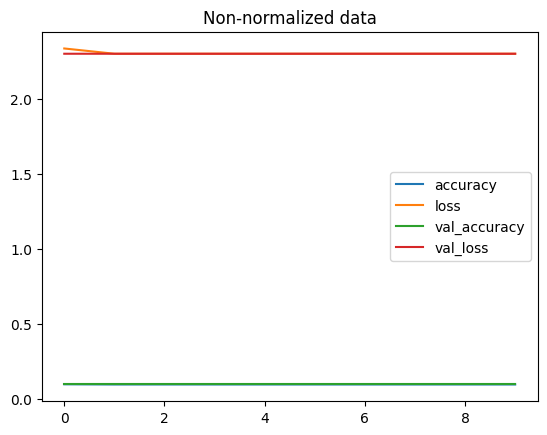

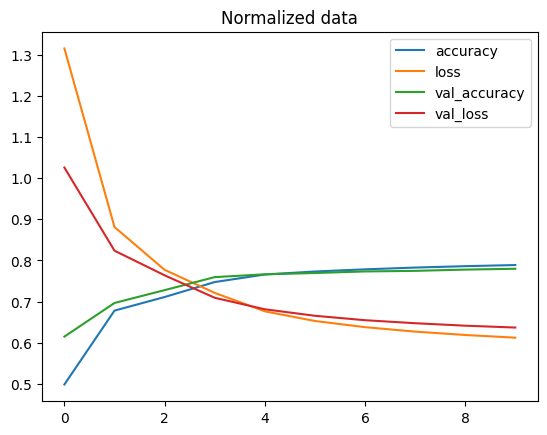

In [ ]:
# Plot Non-normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data");

# Plot Normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized data");

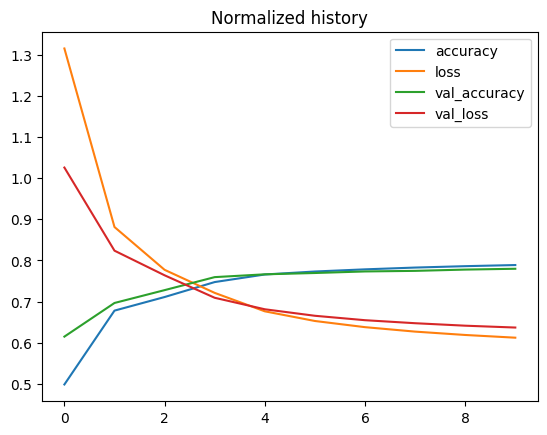

## Finding ideal learning rate

In [ ]:
# Create model
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

find_lr_history = model_13.fit(scaled_X_train, y_train,
                               epochs=40,
                               validation_data=(scaled_X_test, y_test),
                               callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3666 - loss: 1.6516 - val_accuracy: 0.5784 - val_loss: 1.0502 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6253 - loss: 0.9470 - val_accuracy: 0.7201 - val_loss: 0.7895 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7344 - loss: 0.7505 - val_accuracy: 0.7461 - val_loss: 0.7285 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7546 - loss: 0.6946 - val_accuracy: 0.7638 - val_loss: 0.7008 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7663 - loss: 0.6640 - val_accuracy: 0.7744 - val_loss: 0.6785 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7719 - loss: 0.6476 - val_accuracy: 0.7795 - val_loss: 0.6718 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7759 - l

Text(0, 0.5, 'loss')

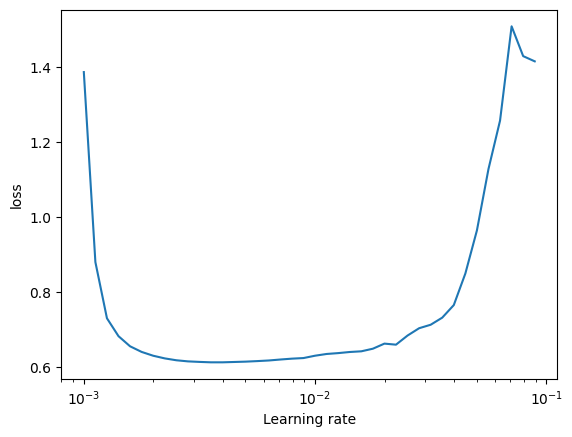

In [ ]:
lrs = 1e-3 * 10 ** (tf.range(40)/20)

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")

In [ ]:
1e-3

0.001

In [ ]:
# Refitting model with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(scaled_X_train, y_train,
                               epochs=20,
                               validation_data=(scaled_X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2212 - loss: 1.9750 - val_accuracy: 0.5905 - val_loss: 1.0962
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6456 - loss: 0.9513 - val_accuracy: 0.7005 - val_loss: 0.7751
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7082 - loss: 0.7454 - val_accuracy: 0.7153 - val_loss: 0.7297
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7258 - loss: 0.7023 - val_accuracy: 0.7232 - val_loss: 0.7136
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7543 - loss: 0.6716 - val_accuracy: 0.7731 - val_loss: 0.6518
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7884 - loss: 0.6155 - val_accuracy: 0.7811 - val_loss: 0.6262
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7948 - loss: 0.5943 - val_accuracy: 0.7878 - val_loss: 0.6151
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7995 - loss: 0.5814 - 

## Evaluating multi-calss classification model

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
y_probs = model_14.predict(scaled_X_test) # prediction probabilities
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(array([9.2611823e-05, 1.7383952e-08, 6.5063773e-06, 7.4479802e-05,
        2.9245796e-06, 1.1604144e-02, 4.7378667e-04, 2.2584571e-01,
        4.4358284e-03, 7.5746399e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Convert numbers from probabilities to integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_test, y_preds)

array([[813,   6,  18,  79,   1,   2,  67,   0,  14,   0],
       [  3, 943,   9,  34,   4,   1,   5,   0,   1,   0],
       [ 39,  19, 744,  17,  92,   0,  82,   0,   7,   0],
       [ 49,  29,   8, 836,  15,   0,  58,   0,   2,   3],
       [  1,   9, 192,  50, 621,   0, 120,   0,   7,   0],
       [  0,   0,   0,   0,   0, 832,   4, 126,  10,  28],
       [223,   3, 138,  75,  86,   0, 446,   0,  27,   2],
       [  0,   0,   0,   0,   0,  15,   0, 910,   0,  75],
       [  2,   1,  12,   8,   1,   4,  31,   4, 924,  13],
       [  0,   0,   0,   0,   0,   1,   4,  38,   4, 953]])

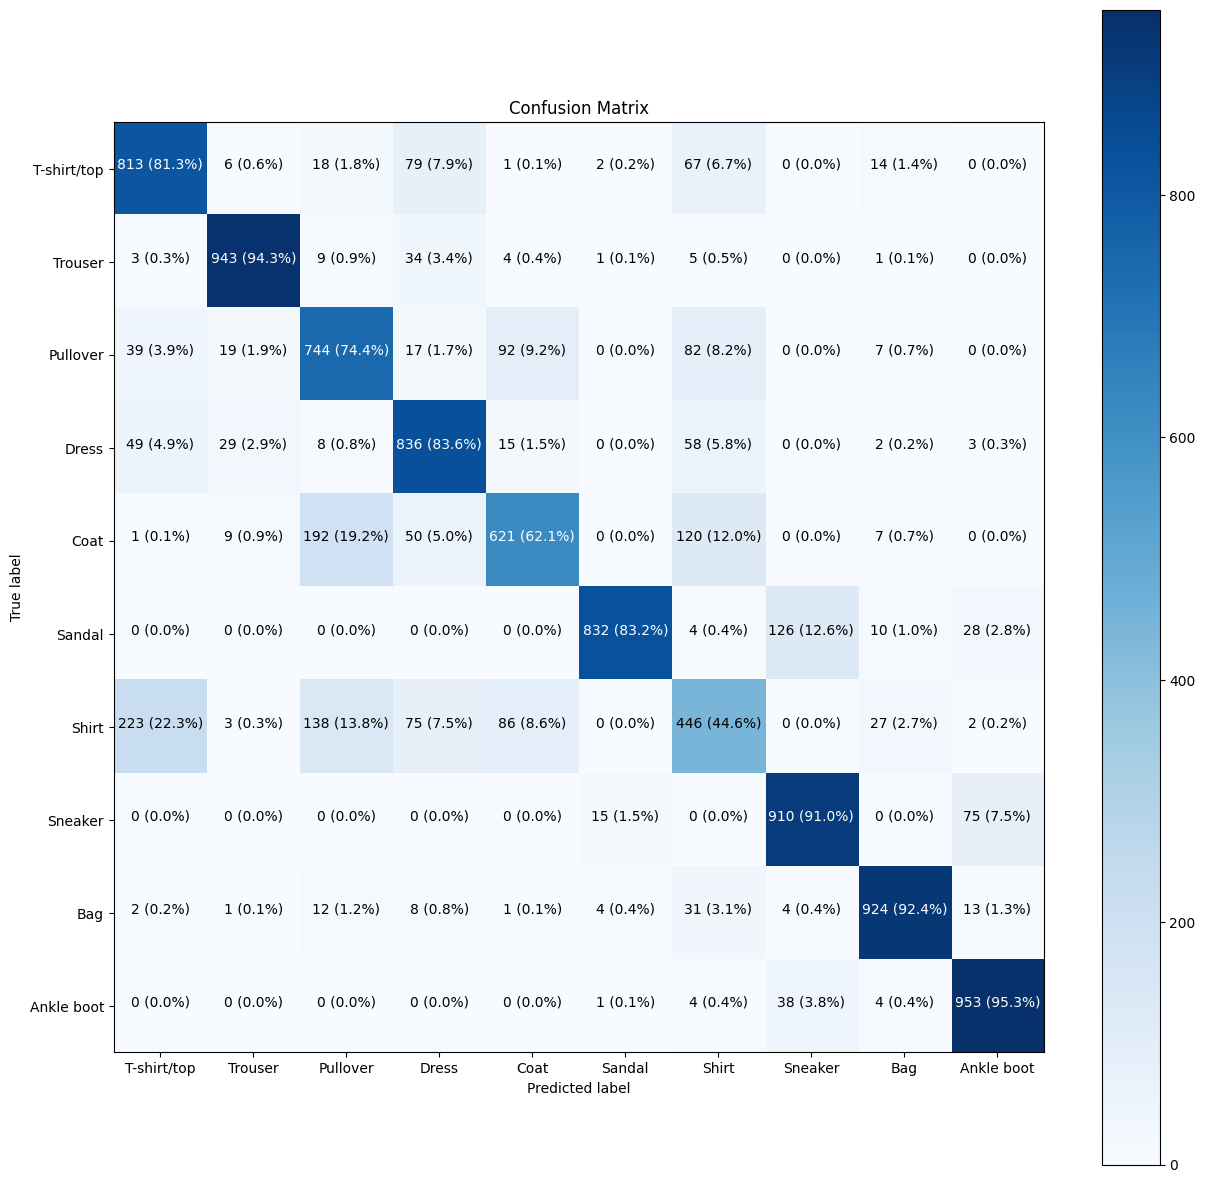

In [ ]:
make_confusion_matrix(y_test, y_preds, figsize=(15, 15), text_size=10, classes=class_names)

### Visualizing random model predictions

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  # pick random number
  i = random.randint(0, len(images))

  # Create prediictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {(100*tf.reduce_max(pred_probs)):2.0f}% (True: {true_label})",
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


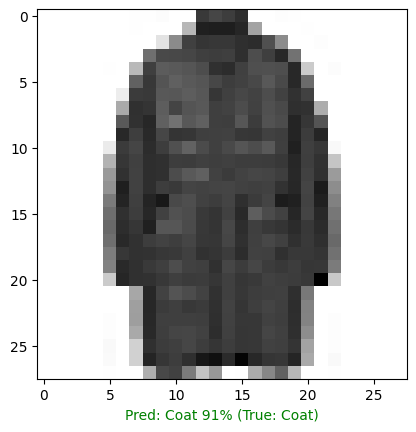

In [ ]:
# Check out image and prediction
plot_random_image(model=model_14, images=scaled_X_test, true_labels=y_test, classes=class_names)

### What patterns is model learning

In [ ]:
# model layers
model_14.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [ ]:
# Extract specific layer
model_14.layers[1]

<Dense name=dense_3, built=True>

In [ ]:
# Get the patterns founded by layer
weights, biases = model_14.layers[1].get_weights()

# Check weights shape
weights, weights.shape

(array([[ 0.5216787 , -0.69683653,  0.77401924, -0.04929492],
        [ 0.8169104 , -0.53820306,  0.29865804,  0.8731291 ],
        [ 0.862047  , -0.62155783,  0.59729415,  0.5765622 ],
        ...,
        [-0.00458725, -0.4248283 , -0.09672751,  0.27885723],
        [ 0.8027005 , -0.33782232, -0.59244096, -0.27897838],
        [-0.01752115,  0.23201083, -0.08713032, -0.39452046]],
       dtype=float32),
 (784, 4))

In [ ]:
# Check the bias vector
biases, biases.shape

(array([1.6289326, 1.3413421, 2.3373113, 2.0731997], dtype=float32), (4,))

In [ ]:
model_14.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

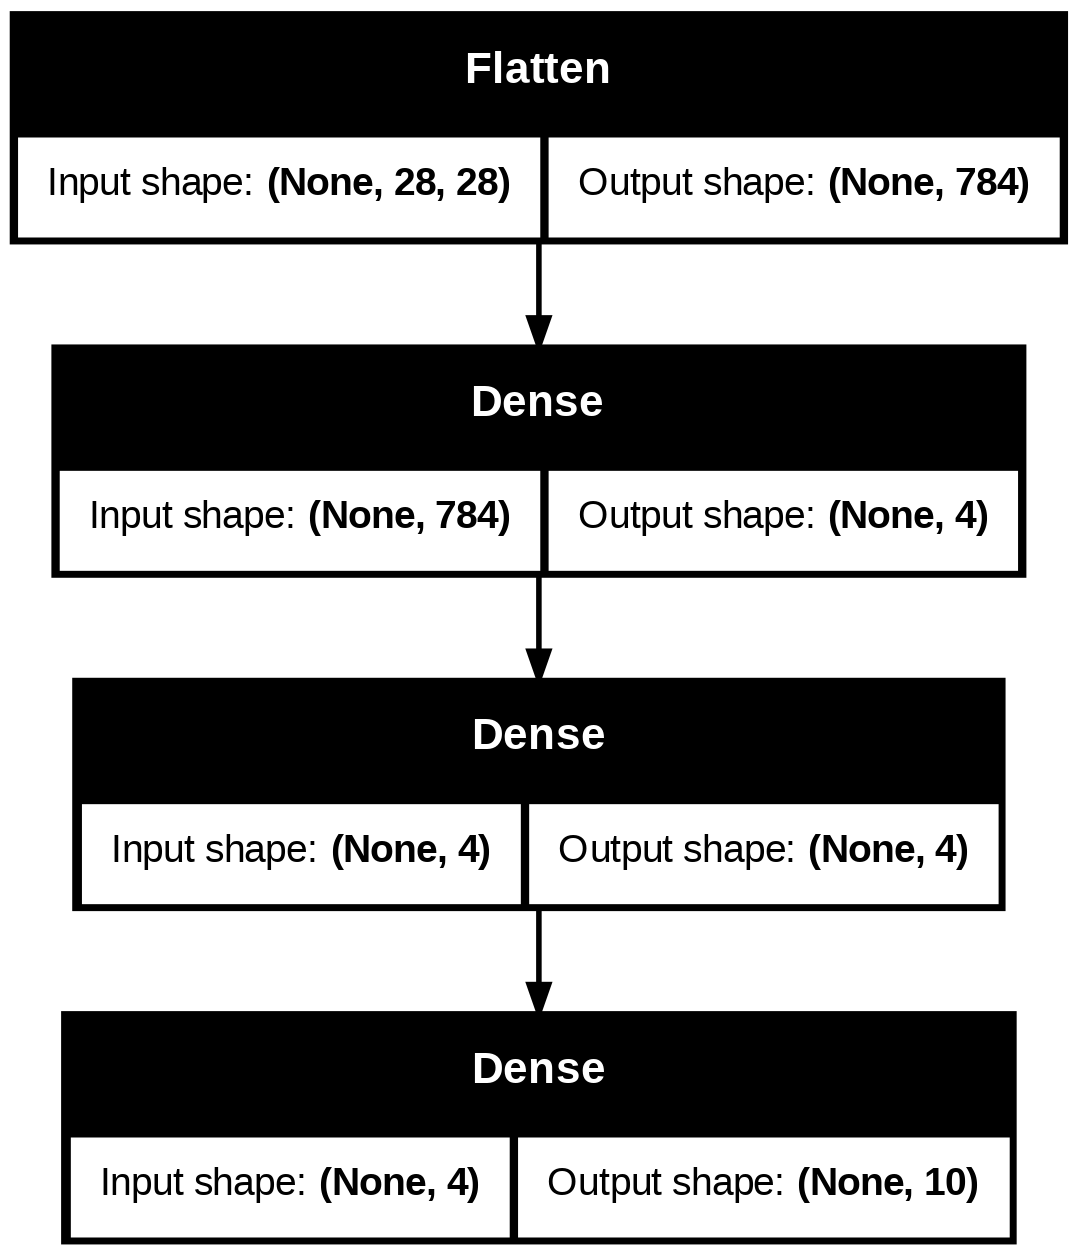

In [ ]:
# More visual way to see deep learning model
from tensorflow.keras.utils import plot_model

# See inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Exercises

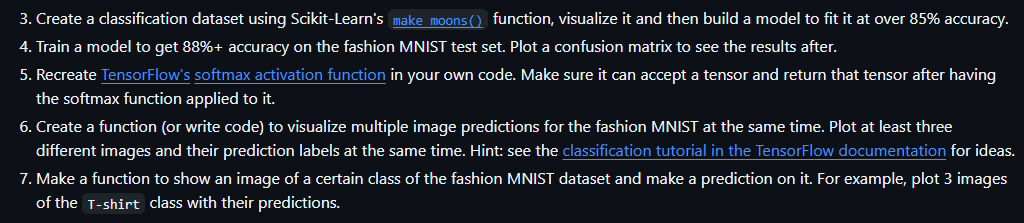

* Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [ ]:
moons_df = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons_df

,X0,X1,label
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


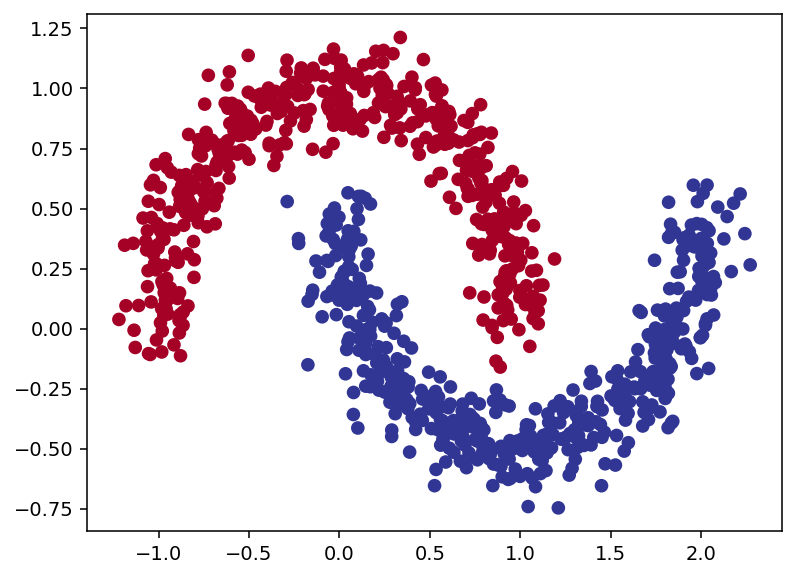

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.fit_transform(X_val)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
# plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit model
model_1.fit(scaled_X_train, y_train, epochs=100, callbacks=[lr_scheduler],
            validation_data=(scaled_X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0000e+00 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6647 - val_accuracy: 0.0000e+00 - val_loss: 0.6456 - learning_rate: 0.0011
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6374 - val_accuracy: 0.0000e+00 - val_loss: 0.6135 - learning_rate: 0.0013
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6025 - val_accuracy: 0.0000e+00 - val_loss: 0.5686 - learning_rate: 0.0014
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5538 - val_accuracy: 0.0000e+00 - val_loss: 0.5091 - learning_rate: 0.0016
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4924 - val_accuracy: 0.0000e+00 - val_loss: 0.4440 - learning_rate: 0.0018
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [ ]:
def plot_decision_boundary(model, X, y):

  # Define axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclassification
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    # Reshaping predictions for plotting them
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    # Reshaping predictions for plotting them
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot Decision Boundary
  plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
# plot_decision_boundary(model_1, scaled_X_train, y_train)

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

# change lambda
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (np.sqrt(epochs)))

# Fit model
model_2.fit(scaled_X_train, y_train, epochs=100, callbacks=[lr_scheduler],
            validation_data=(scaled_X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: 0.7421 - val_accuracy: 0.0000e+00 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6517 - val_accuracy: 0.0000e+00 - val_loss: 0.4580 - learning_rate: 0.0100
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.3550 - val_accuracy: 0.0000e+00 - val_loss: 0.2886 - learning_rate: 0.0260
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3077 - val_accuracy: 0.0000e+00 - val_loss: 0.2398 - learning_rate: 0.0540
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.3116 - val_accuracy: 0.0000e+00 - val_loss: 0.2453 - learning_rate: 0.1000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.3046 - val_accuracy: 0.0000e+00 - val_loss: 0.3040 - learning_rate: 0.1722
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

In [ ]:
# plot_decision_boundary(model_2, scaled_X_train, y_train)

In [ ]:
tf.random.set_seed(42)

# Create model

# Add more layers and more hidden units
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(75, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (np.sqrt(epochs)))

# Fit model
model_3.fit(scaled_X_train, y_train, epochs=100, callbacks=[lr_scheduler],
            validation_data=(scaled_X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6629 - val_accuracy: 0.0000e+00 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4862 - val_accuracy: 0.0000e+00 - val_loss: 0.2947 - learning_rate: 0.0100
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3118 - val_accuracy: 0.0000e+00 - val_loss: 0.2592 - learning_rate: 0.0260
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2984 - val_accuracy: 0.0000e+00 - val_loss: 0.2787 - learning_rate: 0.0540
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.4105 - val_accuracy: 0.0000e+00 - val_loss: 0.2945 - learning_rate: 0.1000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0250 - loss: 0.4892 - val_accuracy: 0.0000e+00 - val_loss: 0.3471 - learning_rate: 0.1722
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
# plot_decision_boundary(model_3, scaled_X_train, y_train)

In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

# try without scheduler
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit model
model_4.fit(scaled_X_train, y_train, epochs=100,
            validation_data=(scaled_X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0000e+00 - loss: 0.6596 - val_accuracy: 0.0000e+00 - val_loss: 0.6442
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6388 - val_accuracy: 0.0000e+00 - val_loss: 0.6175
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6092 - val_accuracy: 0.0000e+00 - val_loss: 0.5801
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5705 - val_accuracy: 0.0000e+00 - val_loss: 0.5383
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5290 - val_accuracy: 0.0000e+00 - val_loss: 0.4952
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4865 - val_accuracy: 0.0000e+00 - val_loss: 0.4545
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4468 - val_accuracy: 0.0000e+00 - val_loss: 0.4173
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

In [ ]:
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit model
history_5 = model_5.fit(scaled_X_train, y_train, epochs=10000, callbacks=[lr_scheduler],
            validation_data=(scaled_X_val, y_val))

Epoch 1/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.6894 - val_accuracy: 0.0000e+00 - val_loss: 0.6722 - learning_rate: 0.0010
Epoch 2/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6658 - val_accuracy: 0.0000e+00 - val_loss: 0.6484 - learning_rate: 0.0011
Epoch 3/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6419 - val_accuracy: 0.0000e+00 - val_loss: 0.6238 - learning_rate: 0.0013
Epoch 4/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6172 - val_accuracy: 0.0000e+00 - val_loss: 0.5989 - learning_rate: 0.0014
Epoch 5/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5924 - val_accuracy: 0.0000e+00 - val_loss: 0.5742 - learning_rate: 0.0016
Epoch 6/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5673 - val_accuracy: 0.0000e+00 - val_loss: 0.5469 - learning_rate: 0.0018
Epoch 7/10000
25/25 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
scaled_X_train.shape

(800, 2)

In [ ]:
tf.random.set_seed(42)

# Create model

# Add Flatten layer
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Accuracy()])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit model
history_6 = model_6.fit(scaled_X_train, y_train, epochs=10000, callbacks=[lr_scheduler],
            validation_data=(scaled_X_val, y_val))

Epoch 1/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0000e+00 - loss: 0.6550 - val_accuracy: 0.0000e+00 - val_loss: 0.6434 - learning_rate: 0.0010
Epoch 2/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6371 - val_accuracy: 0.0000e+00 - val_loss: 0.6235 - learning_rate: 0.0011
Epoch 3/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6161 - val_accuracy: 0.0000e+00 - val_loss: 0.5983 - learning_rate: 0.0013
Epoch 4/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5899 - val_accuracy: 0.0000e+00 - val_loss: 0.5681 - learning_rate: 0.0014
Epoch 5/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5599 - val_accuracy: 0.0000e+00 - val_loss: 0.5363 - learning_rate: 0.0016
Epoch 6/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5279 - val_accuracy: 0.0000e+00 - val_loss: 0.5041 - learning_rate: 0.0018
Epoch 7/10000
25/25 ━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
tf.random.set_seed(42)

# Create model

# Add more hidden layers and change activation function
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.03),
              metrics=[tf.keras.metrics.Accuracy()])

# Do it without scheduler
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit model
history_7 = model_7.fit(scaled_X_train, y_train, epochs=10000,
            validation_data=(scaled_X_val, y_val))

Epoch 1/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 0.6193 - val_accuracy: 0.0000e+00 - val_loss: 0.3524
Epoch 2/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3376 - val_accuracy: 0.0000e+00 - val_loss: 0.3494
Epoch 3/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3377 - val_accuracy: 0.0000e+00 - val_loss: 0.3175
Epoch 4/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3267 - val_accuracy: 0.0000e+00 - val_loss: 0.3352
Epoch 5/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3660 - val_accuracy: 0.0000e+00 - val_loss: 0.3629
Epoch 6/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.4324 - val_accuracy: 0.0000e+00 - val_loss: 0.4209
Epoch 7/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4230 - val_accuracy: 0.0000e+00 - val_loss: 0.3808
Epoch 8/10000
25/25 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

### For two moons dataset needed different algorithm structure or something like that...

* Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale the data to be between 0 and 1
scaled_X_train = X_train / 255.0
scaled_X_test = X_test / 255.0

# Check min and max now
scaled_X_train.min(), scaled_X_train.max()

(0.0, 1.0)

In [ ]:
scaled_X_train.shape, scaled_X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Add scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs/20))

history = model_15.fit(scaled_X_train, y_train, epochs=50,
             callbacks=[lr_scheduler],
             validation_data=(scaled_X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5269 - loss: 1.3976 - val_accuracy: 0.7860 - val_loss: 0.6333 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8033 - loss: 0.5803 - val_accuracy: 0.8187 - val_loss: 0.5326 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8309 - loss: 0.4981 - val_accuracy: 0.8309 - val_loss: 0.4920 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8428 - loss: 0.4599 - val_accuracy: 0.8367 - val_loss: 0.4678 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8494 - loss: 0.4356 - val_accuracy: 0.8417 - val_loss: 0.4504 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8538 - loss: 0.4169 - val_accuracy: 0.8452 - val_loss: 0.4377 - learning_rate: 1.7783e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

Text(0, 0.5, 'loss')

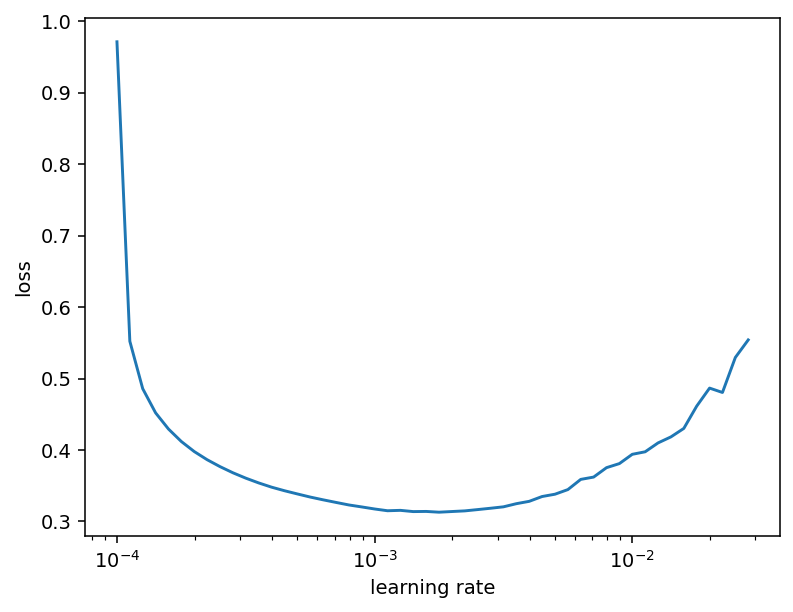

In [ ]:
lrs = 1e-4 * 10 ** (tf.range(50)/20)
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [ ]:
tf.random.set_seed(42)

model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Use ideal learning rate
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"]
)

history = model_16.fit(scaled_X_train, y_train, epochs=50,
             validation_data=(scaled_X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7374 - loss: 0.7705 - val_accuracy: 0.7326 - val_loss: 0.7830
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8112 - loss: 0.5614 - val_accuracy: 0.7997 - val_loss: 0.5914
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8167 - loss: 0.5501 - val_accuracy: 0.8107 - val_loss: 0.6074
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8274 - loss: 0.5307 - val_accuracy: 0.8185 - val_loss: 0.5491
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8294 - loss: 0.5177 - val_accuracy: 0.8076 - val_loss: 0.6033
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8270 - loss: 0.5281 - val_accuracy: 0.8296 - val_loss: 0.5508
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8309 - loss: 0.5155 - val_accuracy: 0.7895 - val_loss: 0.6788
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8317 - loss: 0.5209 - 

In [ ]:
model_16.evaluate(scaled_X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8354 - loss: 0.5633


[0.5994614362716675, 0.8303999900817871]

* Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

In [ ]:
import random

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

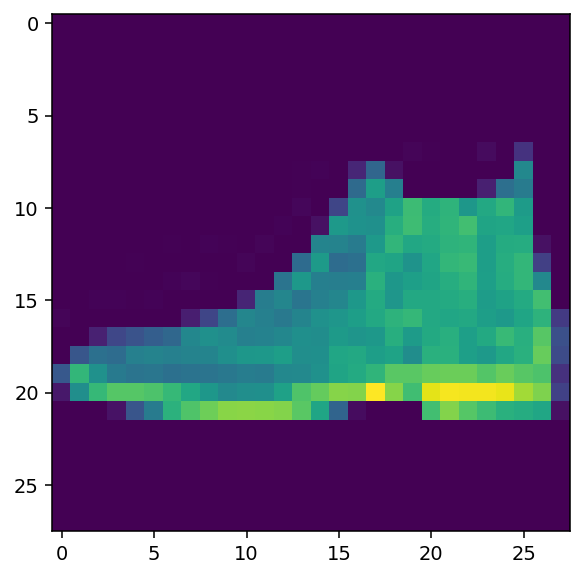

In [ ]:
plt.imshow(scaled_X_test[0])

In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
def plot_image_predictions(model, y_true, images, n_images=3, class_names=class_names):

  # pick n random images and set it up
  predicted_images = []
  for _ in range(n_images):
    i = random.randint(0, len(images))
    target_image = images[i]
    y_prob = model.predict(target_image.reshape(1, 28, 28))
    y_pred = class_names[y_prob.argmax()]
    true_label = class_names[y_true[i]]

    predicted_images.append({"target":target_image,
                             "true_label":true_label,
                             "predicted_label":y_pred,
                             "predicted_probability":y_prob})

    for data in predicted_images:
      if data["predicted_label"] == data["true_label"]:
        color = "green"
      else:
        color = "red"

      plt.subplot(1, n_images, 3)
      # Plot image
      plt.imshow(target_image, cmap=plt.cm.binary)
      plt.xlabel(f"Pred: {data['predicted_label']} {(100*tf.reduce_max(data['predicted_probability'])):2.0f}% (True: {data['true_label']})",
          color=color, rotation=15)  # set the color to green or red


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


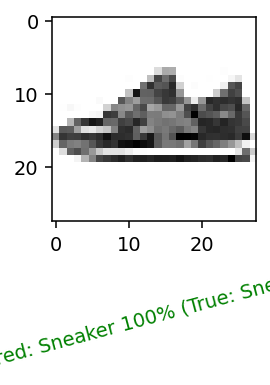

In [ ]:
plot_image_predictions(model_16, y_true=y_test, images=scaled_X_test)